In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST/',one_hot = False)

/home/hadoop/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-labels-idx1-ubyte.gz
Extracting MNIST/t10k-images-idx3-ubyte.gz
Extracting MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
%matplotlib inline

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [17]:
all = 0
n = 1000

tri = mnist.train.images
trl = mnist.train.labels.reshape([-1,1])
vai = mnist.validation.images
val = mnist.validation.labels.reshape([-1,1])
tei = mnist.test.images
tel = mnist.test.labels.reshape([-1,1])

if all != 1:
    tri = tri[:n]
    trl = trl[:n]

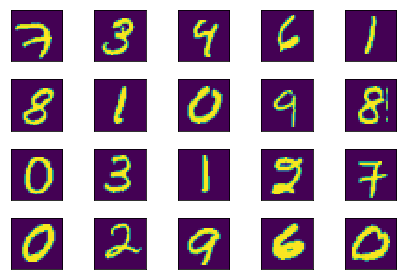

In [6]:
plt.figure()
for n in range(20):
    plt.subplot(4,5,n+1)
    grid_data = tri[n].reshape(28,28)
    plt.imshow(grid_data)
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

#### PCA

In [18]:
from sklearn.preprocessing import StandardScaler
tri_std = StandardScaler().fit_transform(tri)
pca = PCA(n_components=30).fit(tri_std)

Visualization of principal components

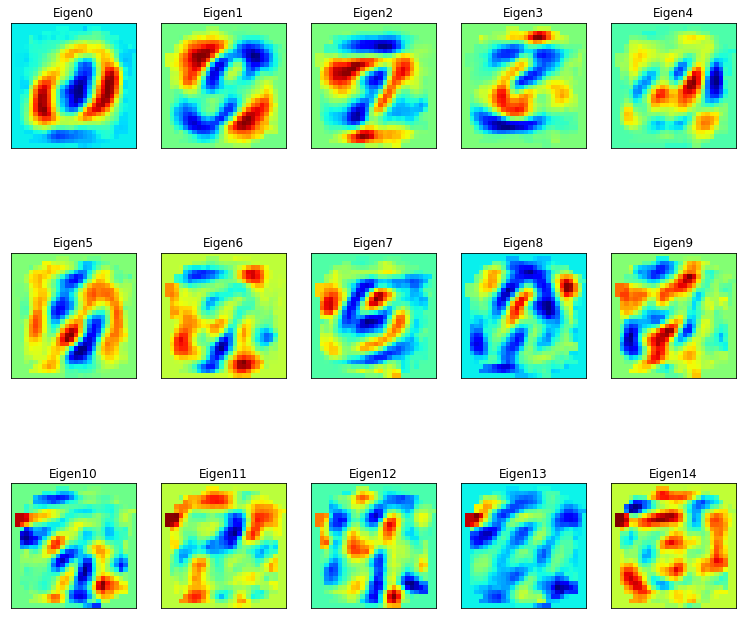

In [19]:
eigenvalues = pca.components_

n_row = 3
n_col = 5

# Plot the first 8 eignenvalues
plt.figure(figsize=(13,12))
for i in list(range(n_row * n_col)):
    offset = 0
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(eigenvalues[i].reshape([28,28]), cmap='jet')
    plt.title('Eigen' + str(i))
    plt.xticks(())
    plt.yticks(())
plt.show()

In [20]:
pca = PCA(n_components=2)
tri_pca = pca.fit_transform(tri_std)

([], <a list of 0 Text yticklabel objects>)

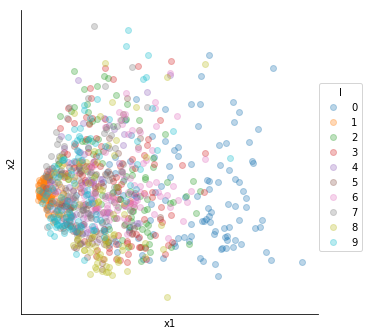

In [21]:
df = pd.DataFrame({'x1':tri_pca[:,0].reshape(-1,), 'x2':tri_pca[:,1].reshape(-1,), 'l':trl.reshape(-1)})
sns.lmplot(x= 'x1',y = 'x2', data=df , hue='l',fit_reg=False, scatter_kws = {'alpha':0.3})
plt.xticks(())
plt.yticks(())

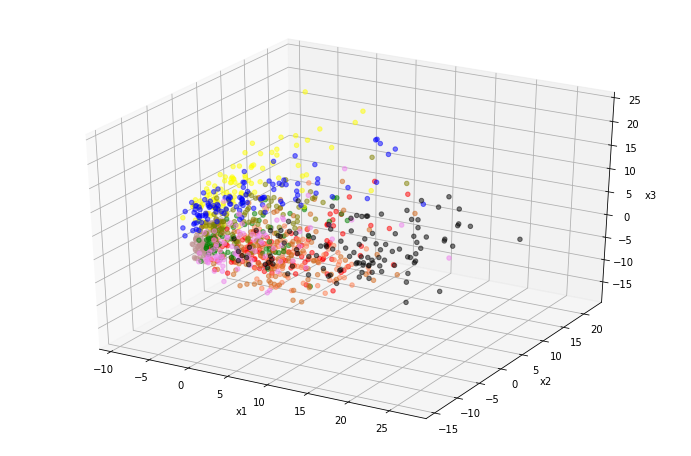

In [22]:
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)
tri_pca = pca.fit_transform(tri_std)
df = pd.DataFrame({'x1':tri_pca[:,0].reshape(-1,), 'x2':tri_pca[:,1].reshape(-1,), 'x3':tri_pca[:,2].reshape(-1,) ,'l':trl.reshape(-1)})
plt.rcParams['figure.figsize'] = (12,8)
ax = plt.subplot(111, projection='3d')
color = ['k','rosybrown','coral','chocolate','olive','g','r','yellow','violet','blue']
for i in range(10):
    temp = df[df.l == i]
    ax.scatter(temp.x1, temp.x2, temp.x3, c=color[i], alpha = 0.5)
ax.set_zlabel('x3')
ax.set_ylabel('x2')
ax.set_xlabel('x1')
plt.show()

#### LDA

In [23]:
lda = LDA(n_components=2)
tri_lda = lda.fit_transform(tri_std, trl)

/home/hadoop/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hadoop/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


([], <a list of 0 Text yticklabel objects>)

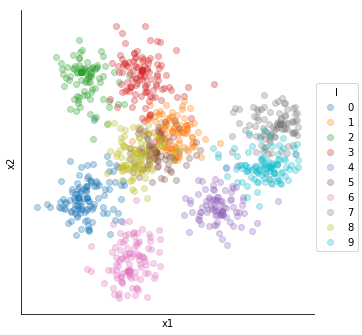

In [24]:
df = pd.DataFrame({'x1':tri_lda[:,0].reshape(-1,), 'x2':tri_lda[:,1].reshape([-1,]), 'l':trl.reshape(-1,)})
sns.lmplot(x= 'x1',y = 'x2', data=df , hue='l',fit_reg=False, scatter_kws = {'alpha':0.3})
plt.xticks(())
plt.yticks(())

/home/hadoop/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hadoop/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


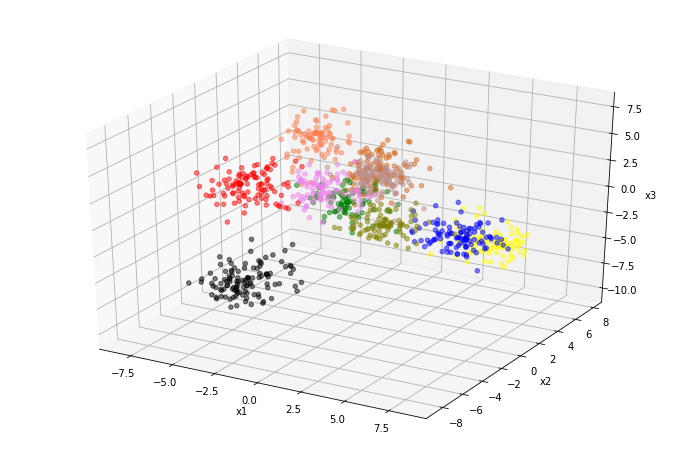

In [29]:
lda = LDA(n_components=3)
tri_lda = lda.fit_transform(tri_std, trl)
df = pd.DataFrame({'x1':tri_lda[:,0].reshape(-1,), 'x2':tri_lda[:,1].reshape(-1,), 'x3':tri_lda[:,2].reshape(-1,) ,'l':trl.reshape(-1)})
plt.rcParams['figure.figsize'] = (12,8)
ax = plt.subplot(111, projection='3d')
color = ['k','rosybrown','coral','chocolate','olive','g','r','yellow','violet','blue']
for i in range(10):
    temp = df[df.l == i]
    ax.scatter(temp.x1, temp.x2, temp.x3, c=color[i], alpha = 0.5)
ax.set_zlabel('x3')
ax.set_ylabel('x2')
ax.set_xlabel('x1')
plt.show()

#### t-sne

In [26]:
tsne = TSNE(n_components = 2)
tri_tsne = tsne.fit_transform(tri)

([], <a list of 0 Text yticklabel objects>)

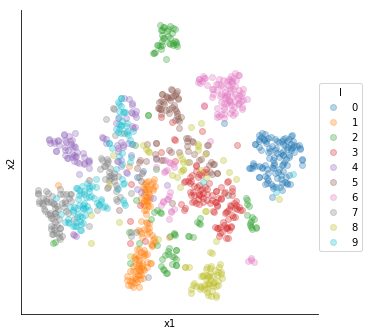

In [27]:
df = pd.DataFrame({'x1':tri_tsne[:,0].reshape(-1,), 'x2':tri_tsne[:,1].reshape([-1,]), 'l':trl.reshape(-1,)})
sns.lmplot(x= 'x1',y = 'x2', data=df , hue='l',fit_reg=False, scatter_kws = {'alpha':0.3})
plt.xticks(())
plt.yticks(())

In [28]:
tsne = TSNE(n_components = 3)
tri_tsne = tsne.fit_transform(tri)

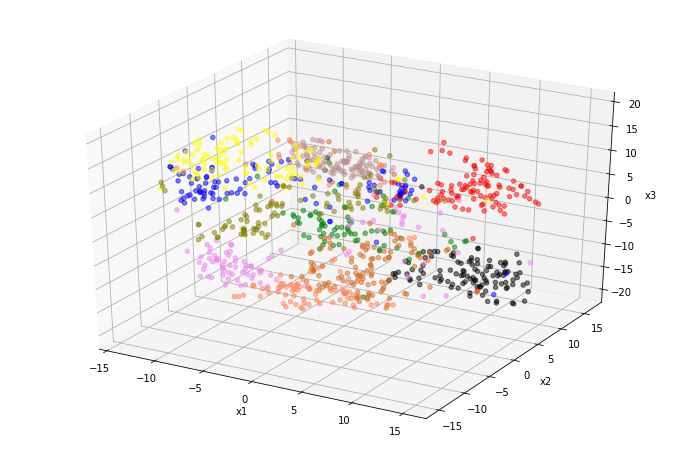

In [31]:
df = pd.DataFrame({'x1':tri_tsne[:,0].reshape(-1,), 'x2':tri_tsne[:,1].reshape(-1,), 'x3':tri_tsne[:,2].reshape(-1,) ,'l':trl.reshape(-1)})
plt.rcParams['figure.figsize'] = (12,8)
ax = plt.subplot(111, projection='3d')
color = ['k','rosybrown','coral','chocolate','olive','g','r','yellow','violet','blue']
for i in range(10):
    temp = df[df.l == i]
    ax.scatter(temp.x1, temp.x2, temp.x3, c=color[i], alpha = 0.5)
ax.set_zlabel('x3')
ax.set_ylabel('x2')
ax.set_xlabel('x1')
plt.show()